Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the 
dataset.
2. Reset the index as "name".
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
data=pd.read_csv(r'D:\Devi\ICT_TVM\ASSIGNMENTS\employee.csv')
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [20]:
data.shape

(9, 7)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [22]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [8]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

The given data contains the employee details which gives the name, age gender, department,grade and performance score of ecah employee.

### 2.Reset the index as "name".

In [23]:
data.set_index('name',inplace=True)

In [24]:
data.head(2)

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520


### 3.Select rows for specific names Jack Morgan and Josh wills.

In [27]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901



### 4.Select data for multiple values "Sales" and “Finance”.

In [34]:
data.loc[data['department'].isin(['Finance','Sales'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5.Display employee who has more than 700 performance score.

In [108]:
data[data.performance_score>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6.Display employee who has more than 500 and less than 700 performance score

In [130]:

filtered_values = np.where((data['performance_score']>=500) & (data['performance_score']< 700))
print(filtered_values)
display(data.iloc[filtered_values])

(array([1, 2, 3, 5], dtype=int64),)


,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7.Check and handle missing values in the dataset.

In [139]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

There are missing values in this data set

Since age and income are continuous numerical value we can will the missing values with mean  and where as gender is a catagorical variable we can fill it with the mode value

C:\Users\Akhil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

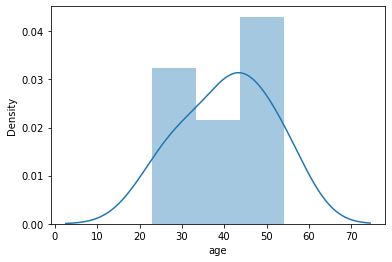

In [134]:
sns.distplot(data['age'])

It is a normal distributed feature, and we can fill it with mean

In [106]:
age=data['age'].mean()
income=data['income'].mean()
gen=data['gender'].mode()
New_data= data.age.fillna(age).apply(np.ceil) 
New_inc=data.income.fillna(income).apply(np.ceil)
New_gen=data.gender.fillna(gen)
data.age=New_data
data.income=New_inc
data.gender=New_gen
# data['age']
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52858.0,F,Operations,G3,723
1,S Kumar,41.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,41.0,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,52858.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [108]:
gen='M'
data.gender.fillna(gen,inplace=True)
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52858.0,F,Operations,G3,723
1,S Kumar,41.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,41.0,62000.0,M,Sales,G3,649
6,James Authur,54.0,52858.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


### 8.Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Outliers in Performancce score')

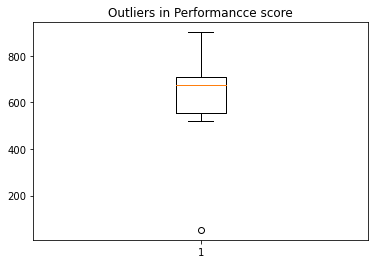

In [65]:
plt.boxplot(data['performance_score'])
plt.title("Outliers in Performancce score")

From the graph we can detect the outlier present in.

In [66]:
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')

In [67]:
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [140]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

323.5
943.5


In [69]:
outlier=[]
for x in data['performance_score']:
    if((x> up_limit) or (x<low_limit)):
        outlier.append(x)

In [70]:
outlier

[53]

In [76]:
ind=data['performance_score']>up_limit
data.loc[ind].index

Int64Index([], dtype='int64')

In [74]:
ind1=data['performance_score']<low_limit
data.loc[ind1].index

Int64Index([6], dtype='int64')

In [79]:
data.drop([6],inplace=True)

Text(0.5, 1.0, 'Box plot for outliers')

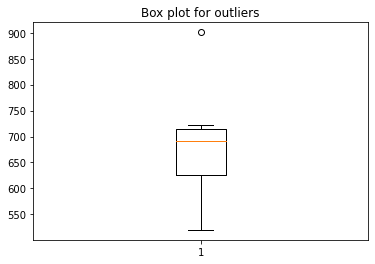

In [80]:
plt.boxplot(data['performance_score'])
plt.title("Box plot for outliers")

### 9.Check the gender column and do Dummy encoding.

In [42]:
data.gender


name
Allen Smith      M
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    M
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [110]:
New_data=pd.get_dummies(data,columns=['gender'],drop_first=True)

In [111]:
New_data

,name,age,income,department,grade,performance_score,gender_M
0,Allen Smith,45.0,52858.0,Operations,G3,723,0
1,S Kumar,41.0,16000.0,Finance,G0,520,0
2,Jack Morgan,32.0,35000.0,Finance,G2,674,1
3,Ying Chin,45.0,65000.0,Sales,G3,556,0
4,Dheeraj Patel,30.0,42000.0,Operations,G2,711,0
5,Satyam Sharma,41.0,62000.0,Sales,G3,649,1
6,James Authur,54.0,52858.0,Operations,G3,53,0
7,Josh Wills,54.0,52000.0,Finance,G3,901,0
8,Leo Duck,23.0,98000.0,Sales,G4,709,1


### 10.Do the standard scaling on the feature performance score

In [132]:
from sklearn.preprocessing import StandardScaler 


# splitting dependent and independant variable
object=StandardScaler()
x=New_data.drop(['performance_score','name','department','grade'], axis=1)
y=New_data['performance_score']

# standardization
scale=object.fit_transform(x)


In [ ]:
print(scale)

In [123]:
x.describe()

,age,income,gender_M
count,9.000000,9.000000,9.000000
mean,40.555556,52857.333333,0.333333
std,10.572501,22541.232065,0.500000
min,23.000000,16000.000000,0.000000
25%,32.000000,42000.000000,0.000000
50%,41.000000,52858.000000,0.000000
75%,45.000000,62000.000000,1.000000
max,54.000000,98000.000000,1.000000


In [125]:
scaled_features = New_data.copy()
 
col_names = ['performance_score']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
scaled_features[col_names] = features
print(scaled_features)

            name   age   income  department grade  performance_score  gender_M
0    Allen Smith  45.0  52858.0  Operations    G3           0.505565         0
1        S Kumar  41.0  16000.0     Finance    G0          -0.408053         0
2    Jack Morgan  32.0  35000.0     Finance    G2           0.285037         1
3      Ying Chin  45.0  65000.0       Sales    G3          -0.246032         0
4  Dheeraj Patel  30.0  42000.0  Operations    G2           0.451558         0
5  Satyam Sharma  41.0  62000.0       Sales    G3           0.172522         1
6   James Authur  54.0  52858.0  Operations    G3          -2.509823         0
7     Josh Wills  54.0  52000.0     Finance    G3           1.306668         0
8       Leo Duck  23.0  98000.0       Sales    G4           0.442557         1


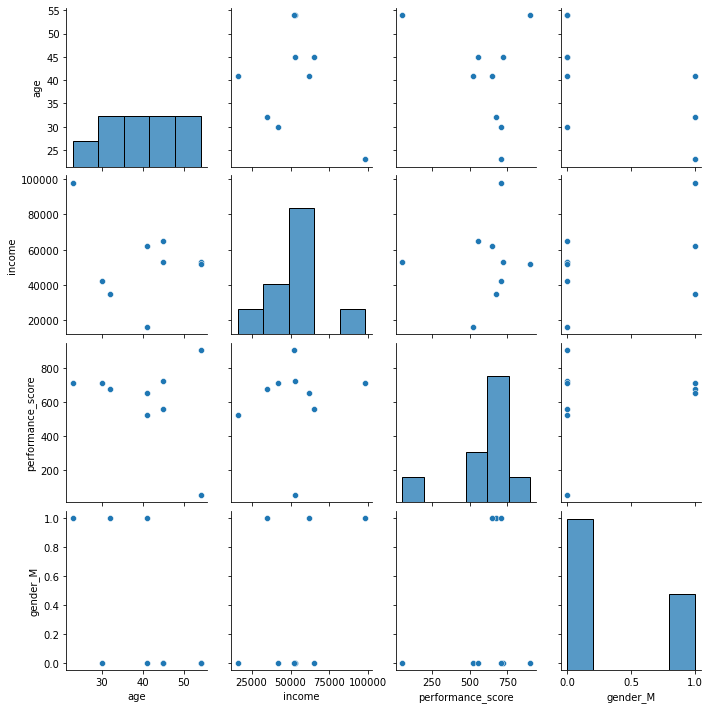

In [117]:
sns.pairplot(data=New_data)